In [1]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cycler
import pandas as pd
import numpy as np
import os
import sys

In [2]:
df1 = pd.read_csv('restotal4.txt', sep=',')

In [17]:
#Convert columns to numeric
num_cols = ['cpus_load','cpus_service', 'concurrency', 'lat_avg', 'lat_stdev', 'lat_max','req_avg', 'req_stdev', 'req_max', 'tot_requests', 'tot_duration','read', 'err_connect', 'err_read', 'err_write', 'err_timeout','req_sec_tot', 'read_tot', 'user_cpu', 'kern_cpu', 'mem_kb_uss','mem_kb_pss', 'mem_kb_rss', 'duration']
for col in num_cols: 
    df1[col]=pd.to_numeric(df1[col])

df1['total_cpu']=df1['user_cpu']+df1['kern_cpu']
df1['cpu_per_request']=df1['total_cpu']/df1['tot_requests']
df1['memory_per_request']=df1['mem_kb_uss']/df1['tot_requests']
    
#Add avg and sem
grouped_df=df1.groupby(['description','asyncservice','asyncdriver','cpus_load','cpus_service','concurrency']).agg(['mean','min','max','sem','std']).reset_index()
grouped_df.columns = ['_'.join(col).strip() for col in grouped_df.columns.values]
grouped_df = grouped_df.reset_index()

#Removing a single outlier
i=grouped_df.loc[(grouped_df['description_']=='Web MVC R2DBC') & (grouped_df['tot_requests_min'] < 1500000)  & (grouped_df['concurrency_'] == 150)].index
grouped_df=grouped_df.drop(grouped_df.index[i])

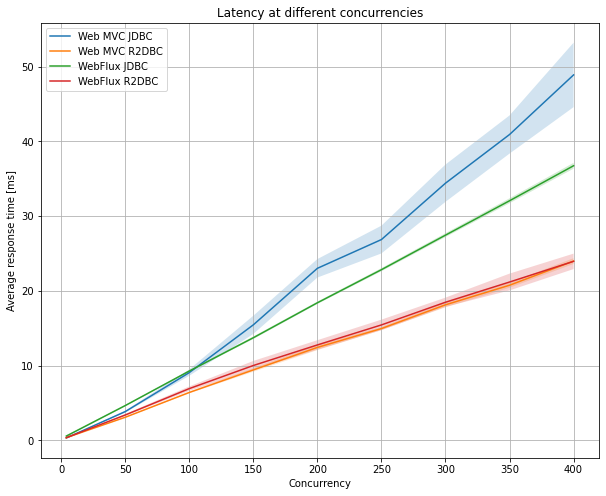

In [18]:
plt.close('all')
figure(num=None, figsize=(10, 8))

def custom_plot(x, y, ymin, ymax, **kwargs):
    ax = kwargs.pop('ax', plt.gca())
    base_line, = ax.plot(x, y, **kwargs)
    ax.fill_between(x, ymin, ymax, facecolor=base_line.get_color(), alpha=0.2)

for group_name in grouped_df['description_'].unique():
        plot_data=grouped_df.loc[grouped_df['description_'] == group_name]
        df_plot=pd.DataFrame({'x': plot_data['concurrency_'], 'y': plot_data['lat_avg_mean'], 'ymin': plot_data['lat_avg_mean']-plot_data['lat_avg_std'],'ymax': plot_data['lat_avg_mean']+plot_data['lat_avg_std']})
        custom_plot(df_plot['x'],df_plot['y'],df_plot['ymin'],df_plot['ymax'],label=group_name)

plt.title('Latency at different concurrencies')
plt.ylabel('Average response time [ms]')
plt.xlabel('Concurrency')
plt.grid(True)
plt.legend()

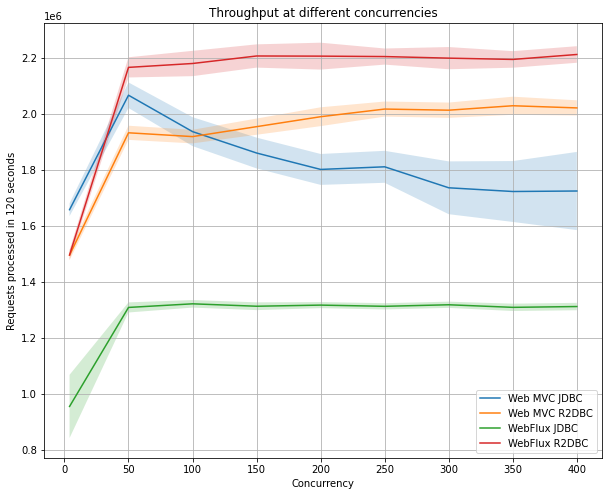

In [19]:
plt.close('all')
figure(num=None, figsize=(10, 8))
for group_name in grouped_df['description_'].unique():
        plot_data=grouped_df.loc[grouped_df['description_'] == group_name]
        df_plot=pd.DataFrame({'x': plot_data['concurrency_'], 'y': plot_data['tot_requests_mean'], 'ymin': plot_data['tot_requests_mean']-plot_data['tot_requests_std'],'ymax': plot_data['tot_requests_mean']+plot_data['tot_requests_std']})
        custom_plot(df_plot['x'],df_plot['y'],df_plot['ymin'],df_plot['ymax'],label=group_name)

plt.title('Throughput at different concurrencies')
plt.ylabel('Requests processed in 120 seconds')
plt.xlabel('Concurrency')
plt.grid(True)
plt.legend()

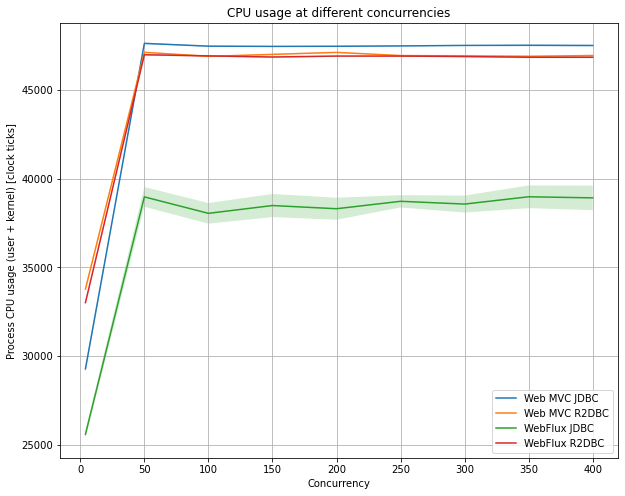

In [20]:
plt.close('all')
figure(num=None, figsize=(10, 8))
for group_name in grouped_df['description_'].unique():
        plot_data=grouped_df.loc[grouped_df['description_'] == group_name]
        df_plot=pd.DataFrame({'x': plot_data['concurrency_'], 'y': plot_data['total_cpu_mean'], 'ymin': plot_data['total_cpu_mean']-plot_data['total_cpu_std'],'ymax': plot_data['total_cpu_mean']+plot_data['total_cpu_std']})
        custom_plot(df_plot['x'],df_plot['y'],df_plot['ymin'],df_plot['ymax'],label=group_name)

plt.title('CPU usage at different concurrencies')
plt.ylabel('Process CPU usage (user + kernel) [clock ticks]')
plt.xlabel('Concurrency')
plt.grid(True)
plt.legend()

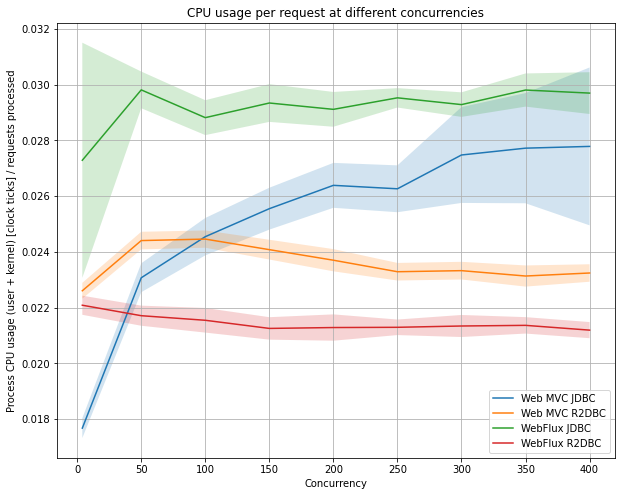

In [21]:
plt.close('all')
figure(num=None, figsize=(10, 8))
for group_name in grouped_df['description_'].unique():
        plot_data=grouped_df.loc[grouped_df['description_'] == group_name]
        df_plot=pd.DataFrame({'x': plot_data['concurrency_'], 'y': plot_data['cpu_per_request_mean'], 'ymin': plot_data['cpu_per_request_mean']-plot_data['cpu_per_request_std'],'ymax': plot_data['cpu_per_request_mean']+plot_data['cpu_per_request_std']})
        custom_plot(df_plot['x'],df_plot['y'],df_plot['ymin'],df_plot['ymax'],label=group_name)

plt.title('CPU usage per request at different concurrencies')
plt.ylabel('Process CPU usage (user + kernel) [clock ticks] / requests processed')
plt.xlabel('Concurrency')
plt.grid(True)
plt.legend()

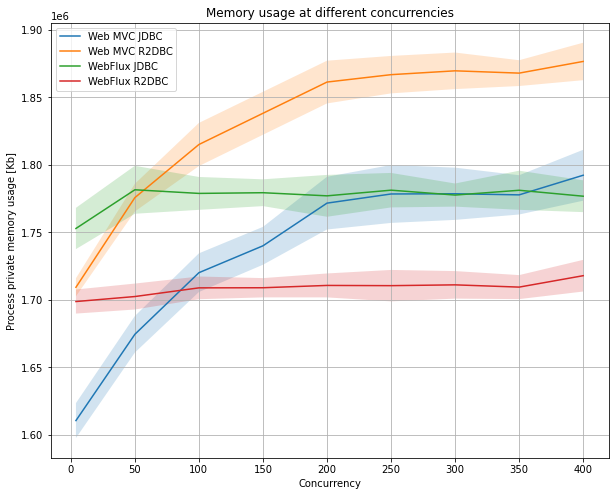

In [22]:
plt.close('all')
figure(num=None, figsize=(10, 8))
for group_name in grouped_df['description_'].unique():
        plot_data=grouped_df.loc[grouped_df['description_'] == group_name]
        df_plot=pd.DataFrame({'x': plot_data['concurrency_'], 'y': plot_data['mem_kb_uss_mean'], 'ymin': plot_data['mem_kb_uss_mean']-plot_data['mem_kb_uss_std'],'ymax': plot_data['mem_kb_uss_mean']+plot_data['mem_kb_uss_std']})
        custom_plot(df_plot['x'],df_plot['y'],df_plot['ymin'],df_plot['ymax'],label=group_name)

plt.title('Memory usage at different concurrencies')
plt.ylabel('Process private memory usage [Kb]')
plt.xlabel('Concurrency')
plt.grid(True)
plt.legend()

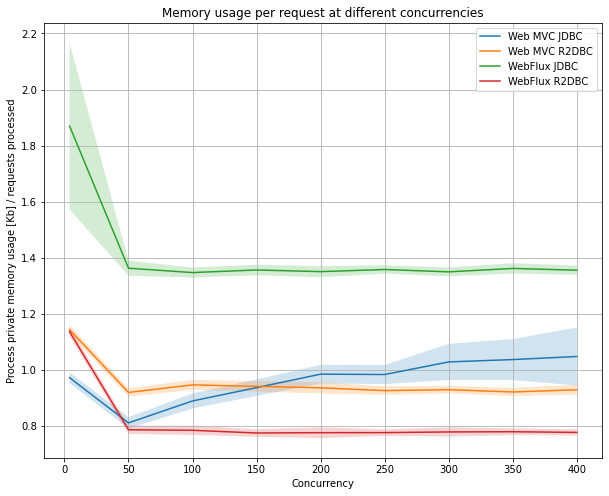

In [23]:
plt.close('all')
figure(num=None, figsize=(10, 8))
for group_name in grouped_df['description_'].unique():
        plot_data=grouped_df.loc[grouped_df['description_'] == group_name]
        df_plot=pd.DataFrame({'x': plot_data['concurrency_'], 'y': plot_data['memory_per_request_mean'], 'ymin': plot_data['memory_per_request_mean']-plot_data['memory_per_request_std'],'ymax': plot_data['memory_per_request_mean']+plot_data['memory_per_request_std']})
        custom_plot(df_plot['x'],df_plot['y'],df_plot['ymin'],df_plot['ymax'],label=group_name)

plt.title('Memory usage per request at different concurrencies')
plt.ylabel('Process private memory usage [Kb] / requests processed')
plt.xlabel('Concurrency')
plt.grid(True)
plt.legend()